In [156]:
# !pip install nltk
import nltk
# nltk.download('stopwords')

In [157]:
#strip function
import string
my_str="   Hello World . "
print(my_str.rstrip())
# rstrip==right strip
# lstrip==left strip
# strip ==both 

   Hello World .


In [158]:
messages = [message.strip() for message in open("SMSSpamCollection")]
print(len(messages))

5574


In [159]:
for num,message in enumerate(messages[:10]):
    print(num," ",message,"\n")

0   ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat... 

1   ham	Ok lar... Joking wif u oni... 

2   spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's 

3   ham	U dun say so early hor... U c already then say... 

4   ham	Nah I don't think he goes to usf, he lives around here though 

5   spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv 

6   ham	Even my brother is not like to speak with me. They treat me like aids patent. 

7   ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune 

8   spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 0906

In [160]:
import pandas as pd

In [161]:
df=pd.read_csv("SMSSpamCollection",sep='\t',names=['label','message'])
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 43.6+ KB


In [163]:
df.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [164]:
df.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [165]:
# Adding length column in df
df['length']=df['message'].apply(len)
df.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [166]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

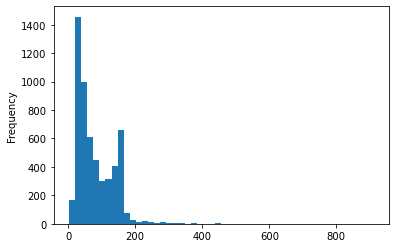

In [167]:
df['length'].plot(bins=50,kind='hist')
# sns.distplot(df['length'],kde=False,bins=50)

In [168]:
df[df['label']=='spam']['length'].describe()

count    747.000000
mean     138.670683
std       28.873603
min       13.000000
25%      133.000000
50%      149.000000
75%      157.000000
max      223.000000
Name: length, dtype: float64

In [169]:
df[df['label']=='ham']['length'].describe()

count    4825.000000
mean       71.482487
std        58.440652
min         2.000000
25%        33.000000
50%        52.000000
75%        93.000000
max       910.000000
Name: length, dtype: float64

In [170]:
df['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [171]:
print("MAX SIZE HAM MESSAGE\n",df[df['length']==910]['message'].iloc[0])

MAX SIZE HAM MESSAGE
 For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later..


In [172]:
print("MAX SIZE SPAM MESSAGE\n",df[df['length']==223]['message'].iloc[0])

MAX SIZE SPAM MESSAGE
 Hi, this is Mandy Sullivan calling from HOTMIX FM...you are chosen to receive £5000.00 in our Easter Prize draw.....Please telephone 09041940223 to claim before 29/03/05 or your prize will be transferred to someone else....


array([<matplotlib.axes._subplots.AxesSubplot object at 0x17957898>,
      dtype=object)

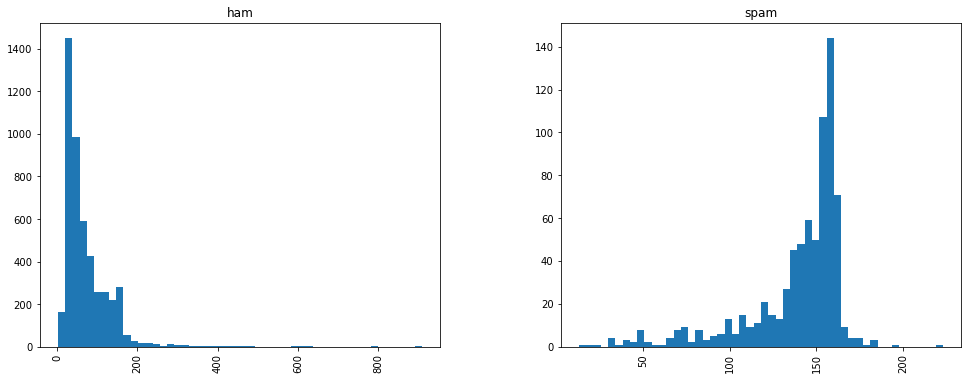

In [173]:
df.hist(column='length',by='label',bins=50,figsize=(16,6))

In [174]:
my_str="Hello World ! My name is Piyush Khanna..."
print(my_str)

Hello World ! My name is Piyush Khanna...


In [175]:
# Now we will process out each message ad remove punctuations from them
print("Punctuations : ",string.punctuation)

Punctuations :  !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [176]:
# Removing punctuations
no_punc=[x for x in my_str if x not in string.punctuation]
print(no_punc)
my_new_str=''.join(no_punc)
print(my_new_str)

['H', 'e', 'l', 'l', 'o', ' ', 'W', 'o', 'r', 'l', 'd', ' ', ' ', 'M', 'y', ' ', 'n', 'a', 'm', 'e', ' ', 'i', 's', ' ', 'P', 'i', 'y', 'u', 's', 'h', ' ', 'K', 'h', 'a', 'n', 'n', 'a']
Hello World  My name is Piyush Khanna


In [177]:
# Now we will remove some common words like a, the etc
from nltk.corpus import stopwords
print("Some stopwords are \n",stopwords.words('english'))

Some stopwords are 
 ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 's

In [178]:
l=my_new_str.split()
l_new=[x for x in l if x.lower() not in stopwords.words('english')]
my_last_string=' '.join(l_new)
print(my_last_string)

Hello World name Piyush Khanna


In [179]:
# Defing method for the above functioning
def text_process(text):
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [180]:
print(text_process("Hello World ! My name is Piyush Khanna..."))

['Hello', 'World', 'name', 'Piyush', 'Khanna']


In [181]:
# Creating matrix of message vs word which have the count of word in matrix and 0 if not
from sklearn.feature_extraction.text import CountVectorizer

In [182]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(df['message'])
# total number of vocab words
print(len(bow_transformer.vocabulary_))

11425


In [183]:
mess6 = df['message'][5]
print(mess6)

FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv


In [184]:
bow6 = bow_transformer.transform([mess6])
print(bow6)
print(bow6.shape)

  (0, 543)	1
  (0, 1943)	1
  (0, 2222)	1
  (0, 2346)	1
  (0, 3930)	1
  (0, 4379)	1
  (0, 4893)	1
  (0, 5467)	1
  (0, 5864)	1
  (0, 6755)	1
  (0, 7800)	1
  (0, 8567)	1
  (0, 9209)	1
  (0, 9641)	1
  (0, 10073)	1
  (0, 10093)	1
  (0, 11011)	1
  (0, 11150)	1
  (0, 11371)	1
(1, 11425)


In [185]:
print(bow_transformer.get_feature_names()[9641])
print(bow_transformer.get_feature_names()[10073])

send
std


In [186]:
messages_bow = bow_transformer.transform(df['message'])

In [187]:
print('Shape of Sparse Matrix: ', messages_bow.shape)
print('Amount of Non-Zero occurences: ', messages_bow.nnz)

Shape of Sparse Matrix:  (5572, 11425)
Amount of Non-Zero occurences:  50548


In [188]:
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format(sparsity))

sparsity: 0.07940295412668218


In [189]:
# # # TF-IDF
# TF-IDF stands for term frequency-inverse document frequency, and the tf-idf weight is a weight often used in 
# information retrieval and text mining. This weight is a statistical measure used to evaluate how important a word is 
# to a document in a collection or corpus. The importance increases proportionally to the number of times a word 
# appears in the document but is offset by the frequency of the word in the corpus. Variations of the tf-idf weighting 
# scheme are often used by search engines as a central tool in scoring and ranking a document's relevance 
# given a user query.

# Example:
# Consider a document containing 100 words wherein the word cat appears 3 times.
# The term frequency (i.e., tf) for cat is then (3 / 100) = 0.03. 
# Now, assume we have 10 million documents and the word cat appears in one thousand of these.
# Then, the inverse document frequency (i.e., idf) is calculated as log(10,000,000 / 1,000) = 4.
# Thus, the Tf-idf weight is the product of these quantities: 0.03 * 4 = 0.12.

In [190]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(messages_bow)
tfidf6 = tfidf_transformer.transform(bow6)
print(tfidf6)

  (0, 11371)	0.21562498424494592
  (0, 11150)	0.20797972406541168
  (0, 11011)	0.22715306908991975
  (0, 10093)	0.1612251876427042
  (0, 10073)	0.2509014163169898
  (0, 9641)	0.15811922187430408
  (0, 9209)	0.29215147836872296
  (0, 8567)	0.16663191124045565
  (0, 7800)	0.1451533754697944
  (0, 6755)	0.2132611765079785
  (0, 5864)	0.2746497635440599
  (0, 5467)	0.3060433709506642
  (0, 4893)	0.1612251876427042
  (0, 4379)	0.29215147836872296
  (0, 3930)	0.3060433709506642
  (0, 2346)	0.2509014163169898
  (0, 2222)	0.1730546963330754
  (0, 1943)	0.2509014163169898
  (0, 543)	0.18730163481531384


In [191]:
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['Hello']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['university']])

6.014770874925312
8.527076498901426


In [192]:
messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)

(5572, 11425)


In [193]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(messages_tfidf, df['label'])

In [194]:
print('predicted:', spam_detect_model.predict(tfidf6)[0])
print('expected:', df.label[3])

predicted: ham
expected: ham


In [195]:
all_predictions = spam_detect_model.predict(messages_tfidf)
print(all_predictions)

['ham' 'ham' 'spam' ... 'ham' 'ham' 'ham']


In [196]:
from sklearn.metrics import classification_report
print (classification_report(df['label'], all_predictions))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      4825
        spam       1.00      0.85      0.92       747

    accuracy                           0.98      5572
   macro avg       0.99      0.92      0.95      5572
weighted avg       0.98      0.98      0.98      5572



In [197]:
from sklearn.model_selection import train_test_split

msg_train, msg_test, label_train, label_test = train_test_split(df['message'], df['label'], test_size=0.2)
print(len(msg_train), len(msg_test), len(msg_train) + len(msg_test))

4457 1115 5572


In [198]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [199]:
pipeline.fit(msg_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x1886ED18>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [200]:
predictions = pipeline.predict(msg_test)

In [201]:
print(classification_report(predictions,label_test))

              precision    recall  f1-score   support

         ham       1.00      0.96      0.98      1017
        spam       0.72      1.00      0.83        98

    accuracy                           0.97      1115
   macro avg       0.86      0.98      0.91      1115
weighted avg       0.97      0.97      0.97      1115



In [202]:
def check(msg):
    print(pipeline.predict(msg))

In [204]:
check(['Congrats! Nokia 3650 video camera phone is your Call 09066382422 Calls cost 150ppm Ave call 3mins vary from mobiles 16+ Close 300603 post BCM4284 Ldn WC1N3XX'])

['spam']
